In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

#### Cash Request DataFrame

In [4]:
data_1 = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')
df_cash_request = data_1.copy()
df_cash_request.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
4747,11009,75.0,rejected,2020-08-05 17:28:52.733445+00,2020-08-06 09:03:49.538395+00,20583.0,2020-08-06 09:03:49.535972+00,NaN,2020-08-31 22:00:00+00,NaN,NaN,regular,2020-08-12 17:28:52.732965+00,NaN,NaN,NaN
150,281,100.0,rejected,2019-12-21 18:46:12.410764+00,2019-12-22 13:51:24.710919+00,1647.0,2019-12-22 13:51:24.70321+00,NaN,2020-01-20 18:46:12.410302+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3310,9878,100.0,rejected,2020-07-28 16:24:37.369155+00,2020-07-29 08:35:44.149165+00,34681.0,2020-07-29 08:35:44.138483+00,NaN,2020-09-01 22:00:00+00,NaN,NaN,regular,2020-08-04 16:24:37.368488+00,NaN,NaN,NaN
9028,20033,50.0,direct_debit_rejected,2020-10-09 07:52:17.348608+00,2020-10-28 22:18:50.051857+00,63750.0,NaN,NaN,2020-10-19 07:52:33.734853+00,2020-10-10,NaN,instant,2020-10-09 07:52:33.734853+00,pending,2020-10-28 22:18:46.510283+00,2020-10-28 22:18:50.065487+00
20499,22878,70.0,money_back,2020-10-21 19:14:55.906945+00,2020-12-18 13:12:33.782344+00,59623.0,NaN,NaN,2020-11-18 22:00:00+00,2020-10-22,2020-11-18 18:55:52.978634+00,instant,2020-10-21 19:15:06.730738+00,NaN,NaN,NaN
19425,21242,50.0,money_back,2020-10-15 08:20:24.046821+00,2020-12-18 13:12:05.329619+00,31952.0,2020-10-15 10:58:09.281206+00,NaN,2020-11-06 11:00:00+00,2020-10-16,2020-11-10 23:00:00+00,instant,2020-10-15 08:20:38.870164+00,NaN,NaN,NaN
20797,24969,25.0,money_back,2020-10-27 07:43:22.786965+00,2020-12-18 13:12:39.178664+00,75866.0,NaN,NaN,2020-11-11 07:43:19.059+00,2020-10-31,2020-11-11 19:13:16.06874+00,instant,2020-10-30 15:21:35.123833+00,NaN,NaN,NaN
17777,18333,100.0,money_back,2020-09-29 07:58:05.256954+00,2020-12-18 13:11:24.521706+00,50295.0,2020-09-29 09:09:09.118299+00,NaN,2020-11-02 22:00:00+00,2020-09-30,2020-11-05 23:00:00+00,instant,2020-10-06 07:58:05.210032+00,NaN,NaN,NaN
22727,17330,100.0,money_back,2020-09-22 17:31:39.002537+00,2020-12-18 13:13:50.443566+00,47155.0,2020-09-23 07:56:20.606209+00,NaN,2020-11-08 23:00:00+00,2020-09-26,2020-11-09 19:11:13.584864+00,instant,2020-10-06 17:31:38.97935+00,NaN,NaN,NaN
20961,25147,100.0,money_back,2020-10-27 11:59:21.922799+00,2020-12-18 13:12:43.79877+00,13796.0,2020-10-27 18:03:13.258915+00,NaN,2020-11-05 22:00:00+00,2020-10-29,2020-11-05 20:50:24.79593+00,instant,2020-10-27 11:59:30.484058+00,NaN,NaN,NaN


#### Fees DataFrame

In [5]:
data_2 = pd.read_csv('../project_dataset/extract - fees - data analyst - .csv')
df_fees = data_2.copy()
df_fees.sample(10)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
14282,7096,15536.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 15536,2020-09-10 14:13:05.487208+00,2020-10-13 14:25:12.122369+00,2020-12-17 11:14:22.964808+00,NaN,NaN,after
8194,19889,26215.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26215,2020-10-29 21:03:02.900356+00,2020-10-29 21:03:02.900379+00,2020-12-28 18:39:30.733994+00,NaN,NaN,after
16393,793,2641.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 2641,2020-06-29 18:34:38.100521+00,2020-10-13 14:25:15.917341+00,NaN,2020-07-06 22:00:00+00,2020-07-21 22:00:00+00,after
16743,4556,8348.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 8348,2020-08-21 09:29:12.400963+00,2020-10-13 14:25:16.348592+00,NaN,2020-08-13 22:00:00+00,2020-09-04 10:00:00+00,after
4563,15980,23100.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23100,2020-10-22 14:21:10.328768+00,2020-10-22 14:21:10.328791+00,2020-11-19 05:06:03.468417+00,NaN,NaN,after
5060,16405,22000.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22000,2020-10-23 13:32:13.529536+00,2020-10-23 13:32:13.529566+00,NaN,2020-10-28 11:00:00+00,2020-11-27 11:00:00+00,before
693,15006,22326.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 22326,2020-10-20 05:32:52.347783+00,2020-10-20 05:32:52.347813+00,2020-11-05 20:38:20.261231+00,NaN,NaN,after
19734,19600,25976.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 25976,2020-10-29 08:53:53.882046+00,2020-10-29 08:53:53.88212+00,2020-12-03 19:43:34.27835+00,NaN,NaN,after
9633,16549,23639.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23639,2020-10-23 16:31:55.579972+00,2020-10-23 16:31:55.579994+00,2020-11-03 19:30:44.432054+00,NaN,NaN,after
10685,6300,3094.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 8/2020,2020-09-05 23:30:03.346637+00,2020-10-13 14:25:05.685795+00,2020-11-24 07:00:43.121889+00,NaN,NaN,after


<h2 style="color: #008080;">Data Cleaning</h2>

#### Crash Request DataFrame

In [6]:
# Get the shape: rows and columns
df_cash_request.shape

(23970, 16)

In [7]:
# Checking for empty spaces
df_cash_request.eq(" ").sum()

id                            0
amount                        0
status                        0
created_at                    0
updated_at                    0
user_id                       0
moderated_at                  0
deleted_account_id            0
reimbursement_date            0
cash_request_received_date    0
money_back_date               0
transfer_type                 0
send_at                       0
recovery_status               0
reco_creation                 0
reco_last_update              0
dtype: int64

In [8]:
# chechking for duplicates
print(df_cash_request.duplicated().sum())

0


In [9]:
# Checking for NaNs
df_cash_request.isna().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [10]:
# We want to analyze the following columns 
# user_id, deleted_account_id, recovery_status, reco_creation and reco_last_update

# We create a new Dataframe only with the recovery incident details
# --> reduce null values from recovery_status, reco_creation, reco_last_update in the df_cash_request DataFrames
df_recovery_incidents = df_cash_request[df_cash_request["recovery_status"].notnull()]

# We create in df_cash_request the recovery_status column to detail wether there are incidents or not
# We have created it from reco_creation but any of these three columns could be used for that
df_cash_request["recovery_incident"] = ~df_cash_request["reco_creation"].isna()


# Drop the columns: recovery_status, reco_creation, reco_last_update from df_cash_request
# They contain to many NaN values and we want them out to clean our DataFrame
df_cash_request.drop(columns= ["recovery_status","reco_creation","reco_last_update"], inplace=True) 
df_cash_request

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,False
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,False
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,False
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,False
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,True
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,False
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,False


In [11]:
# Now we have two DataFrames: 
# df_cash_request with the new column recovery_incident wich tell us if there was any recovery incident (True), or not (False)
# and another DataFrame df_recovery_incidents with the information of these recovery incidents 

In [12]:
# Now we want to analyce user_id and deleted_account_id
df_cash_request[["id", "user_id", "deleted_account_id"]]

,id,user_id,deleted_account_id
0,5,804.0,NaN
1,70,231.0,NaN
2,7,191.0,NaN
3,10,761.0,NaN
4,1594,7686.0,NaN
...,...,...,...
23965,20616,13681.0,NaN
23966,25243,NaN,30367.0
23967,22357,82122.0,NaN
23968,20256,64517.0,NaN


In [13]:
# Merge "user_id" and "deleted_account_id" to have no NaN values
df_cash_request["user_id_merged"] = df_cash_request["user_id"].fillna(df_cash_request["deleted_account_id"])
df_cash_request.drop(columns= ["user_id", "deleted_account_id"], inplace=True) 
df_cash_request.sample(10)

,id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged
6124,15104,100.0,rejected,2020-09-08 09:50:45.109859+00,2020-09-08 10:48:27.8764+00,2020-09-08 10:48:27.867087+00,2020-10-06 22:00:00+00,NaN,NaN,regular,2020-09-15 09:50:45.067742+00,False,34619.0
23478,7196,100.0,money_back,2020-07-08 16:42:08.536167+00,2020-12-18 13:15:20.343283+00,2020-07-08 17:56:50.882021+00,2020-08-10 22:00:00+00,2020-07-09,2020-10-27 14:43:45.718067+00,regular,NaN,True,23322.0
6551,15870,50.0,rejected,2020-09-12 14:14:14.706088+00,2020-09-12 15:22:00.541465+00,2020-09-12 15:22:00.534293+00,2020-10-07 22:00:00+00,NaN,NaN,instant,2020-09-19 14:14:14.665362+00,False,5174.0
5240,7112,100.0,direct_debit_rejected,2020-07-08 09:41:20.297097+00,2020-10-24 22:41:56.697437+00,2020-07-08 10:11:25.697001+00,2020-10-14 08:38:45.678+00,2020-07-10,NaN,regular,NaN,True,30009.0
5285,12782,100.0,rejected,2020-08-17 11:20:38.87685+00,2020-08-17 11:24:54.847444+00,2020-08-17 11:24:54.842633+00,2020-09-03 11:20:38.83043+00,NaN,NaN,instant,2020-08-24 11:20:38.83043+00,False,35178.0
14186,9681,100.0,money_back,2020-07-25 13:11:12.619845+00,2020-12-18 13:10:02.552658+00,2020-07-28 10:32:49.199951+00,2020-08-07 10:00:00+00,2020-07-30,2020-08-09 22:00:00+00,instant,2020-08-01 13:11:12.619324+00,False,11660.0
4682,9250,80.0,rejected,2020-07-21 12:57:25.453711+00,2020-07-21 13:38:21.606375+00,2020-07-21 13:38:21.60357+00,2020-08-16 23:51:00+00,NaN,NaN,regular,2020-07-28 12:57:25.453256+00,False,18148.0
18322,19806,100.0,money_back,2020-10-08 08:53:22.777457+00,2020-12-18 13:11:37.82926+00,NaN,2020-11-03 22:00:00+00,2020-10-09,2020-11-04 07:31:07.890636+00,instant,2020-10-08 08:53:46.065496+00,False,64234.0
8947,25396,50.0,rejected,2020-10-27 21:17:48.645025+00,2020-10-28 10:17:19.27724+00,2020-10-28 10:17:19.271233+00,2020-11-18 23:51:00+00,NaN,NaN,instant,2020-10-27 21:18:15.953418+00,False,6613.0
8173,19709,50.0,direct_debit_rejected,2020-10-07 19:25:55.024618+00,2020-11-18 22:53:07.073781+00,2020-10-08 08:05:53.753381+00,2020-11-05 22:00:00+00,2020-10-14,NaN,instant,2020-10-07 19:26:17.536538+00,True,30654.0


In [14]:
# We keep everything else with NaN
df_cash_request.isna().sum()

id                               0
amount                           0
status                           0
created_at                       0
updated_at                       0
moderated_at                  7935
reimbursement_date               0
cash_request_received_date    7681
money_back_date               7427
transfer_type                    0
send_at                       7329
recovery_incident                0
user_id_merged                   0
dtype: int64

### Fees DataFrame

In [15]:
df_fees.shape

(21061, 13)

In [16]:
# chechking for duplicates
print(df_fees.duplicated().sum())

0


In [17]:
# Checking for empty spaces
df_fees.eq(" ").sum()

id                 0
cash_request_id    0
type               0
status             0
category           0
total_amount       0
reason             0
created_at         0
updated_at         0
paid_at            0
from_date          0
to_date            0
charge_moment      0
dtype: int64

In [18]:
# Checking for NaNs
df_fees.isna().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [19]:
# Save information about cases with pospone fees 
# to a new data frame `df_postpone_fees`
df_postpone_fees = df_fees[df_fees["from_date"].notnull()]
df_postpone_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
11,15434,21897.0,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00,2020-10-21 09:00:21.619504+00,2020-10-21 09:00:25.398771+00,2020-10-26 22:00:00+00,2020-10-30 23:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
17,13949,19876.0,postpone,accepted,NaN,5.0,Postpone Cash Request 19876,2020-10-16 08:34:39.39839+00,2020-10-16 08:34:39.398412+00,2020-10-16 08:34:43.529531+00,2020-10-23 13:25:59.902+00,2020-11-03 23:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,411,3891.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3891,2020-06-22 08:24:47.439636+00,2021-01-20 14:46:09.980392+00,NaN,2020-07-03 22:00:00+00,2020-07-18 22:00:00+00,before
20597,1022,2717.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2717,2020-07-04 10:05:48.68153+00,2021-01-20 16:59:23.745182+00,2020-07-04 10:05:52+00,2020-07-07 22:00:00+00,2020-08-04 22:00:00+00,before
20605,681,3716.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3716,2020-06-26 15:13:10.276716+00,2021-01-21 15:47:52.053382+00,2020-06-26 15:13:45+00,2020-07-20 22:00:00+00,2020-08-04 22:00:00+00,before
20607,4561,10801.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10801,2020-08-21 11:28:54.470364+00,2021-01-21 16:54:46.995586+00,2020-08-21 11:29:00+00,2020-09-08 10:00:00+00,2020-10-07 10:00:00+00,before


In [20]:
# drop columns "from_date","to_date" because of lots of NaN
# keep the information True/False for postpone fees in postpone_fees
df_fees["postpone_fees"] = df_fees["from_date"].notna()
df_fees.drop(columns= ["from_date","to_date"], inplace=True) 
df_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False


In [21]:
# category column describes the reason of the incident fee.
# save this information separately, keep a flag that there was an incident
df_fees_incident = df_fees[df_fees["category"].notnull()]
df_fees_incident

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False
7,14187,14839.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00,2020-10-16 23:48:50.655988+00,2020-11-05 14:15:36.600041+00,after,False
15,14420,17963.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00,2020-10-17 22:18:53.924429+00,2020-10-17 22:19:00.10911+00,after,False
27,14433,10287.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00,2020-10-17 22:19:48.806303+00,2020-12-17 14:33:35.516056+00,after,False
40,14188,15989.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.16855+00,2020-10-16 23:48:52.168578+00,2020-11-16 13:33:09.113667+00,after,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21044,3491,8952.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00,2020-10-13 14:25:02.938088+00,2020-10-08 07:24:45.091469+00,after,False
21045,7166,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00,2020-10-13 14:25:02.546591+00,2020-10-08 07:24:44.561304+00,after,False
21046,12566,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00,2020-10-13 14:25:18.627143+00,NaN,after,False
21047,13537,14289.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00,2020-10-14 22:35:49.950347+00,NaN,after,False


In [22]:
# new colum is_incident created and replace tha category column
df_fees["is_incident"] = df_fees["category"].notna()
df_fees.drop(columns= ["category"], inplace=True) 
df_fees

,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident
0,6537,14941.0,instant_payment,rejected,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False,False
1,6961,11714.0,incident,accepted,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False,True
2,16296,23371.0,instant_payment,accepted,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False,False
3,20775,26772.0,instant_payment,accepted,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False,False
4,11242,19350.0,instant_payment,accepted,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False,False
21057,20768,26764.0,instant_payment,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False,False
21058,18779,25331.0,instant_payment,rejected,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False,False
21059,16542,23628.0,instant_payment,rejected,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False,False


<h2 style="color: #008080;">Identifying Cohorts</h2>

In [23]:
# We want to divide cohorts by the created_at column
# first we want to check the data type of the dates
df_cash_request.dtypes

id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
moderated_at                   object
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_incident                bool
user_id_merged                float64
dtype: object

In [24]:
# convert all values to datetime format in one column
df_cash_request["created_at"] = pd.to_datetime(df_cash_request["created_at"])

In [25]:
# new column with yy_mm from created_at
df_cash_request["month_created"] = df_cash_request["created_at"].dt.strftime('%Y-%m')

In [26]:
# See the period of type where the data cames from
print(df_cash_request["month_created"].nunique())
print(df_cash_request["month_created"].max())
print(df_cash_request["month_created"].min())
print(df_cash_request["month_created"].mode())

13
2020-11
2019-11
0    2020-10
Name: month_created, dtype: object


In [27]:
# rename id column to cash_request_id
df_cash_request.rename(columns={"id": "cash_request_id"}, inplace=True)
df_cash_request.head(1)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12


In [28]:
# see amount of user for each month
df_cash_request[["cash_request_id", "month_created"]].groupby("month_created").count()

,cash_request_id
month_created,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


In [29]:
# drop the fist month records because there was only one cash request in the opening month
df_cash_request[df_cash_request["month_created"] == '2019-11']

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,2019-11-20 12:16:50+00,2019-12-05 23:00:00+00,NaN,NaN,regular,NaN,False,47.0,2019-11


In [30]:
# create a new dataframe with the date created sorted
df_cash_request_hist = df_cash_request.sort_values("created_at")
df_cash_request_hist.head(5)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,2019-11-20 12:16:50+00,2019-12-05 23:00:00+00,NaN,NaN,regular,NaN,False,47.0,2019-11
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00,2019-12-09 14:58:28+00,2019-12-16 23:00:00+00,NaN,NaN,regular,NaN,False,1309.0,2019-12
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00,2019-12-11 09:40:33+00,2020-02-05 23:00:00+00,2019-12-11,NaN,regular,NaN,True,812.0,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,2019-12-11 09:46:59.777728+00,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,False,191.0,2019-12


Cash requests by month


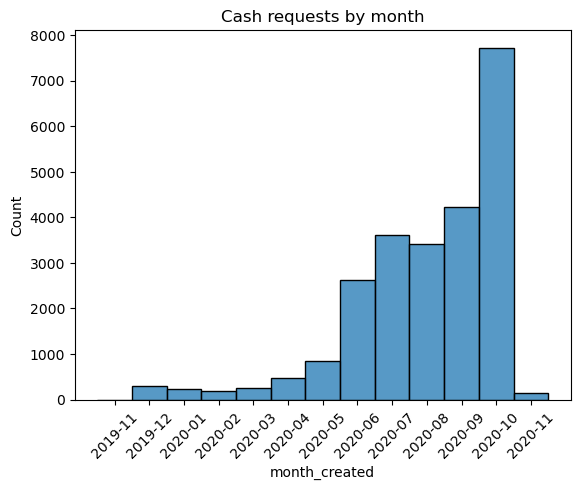

In [31]:
print("Cash requests by month")

plt.figure()
sns.histplot(x="month_created", data=df_cash_request_hist, discrete=True)
plt.title(f'Cash requests by month')
plt.xticks(rotation=45)
plt.show()

# We can use this histogram to show how we devided the cohorts

In [32]:
# We observe high kurtosis and negative Skewing

In [33]:
# Creating the cohorts
min_date = df_cash_request["month_created"].min()
max_date = df_cash_request["month_created"].max()

bins = [min_date , '2020-05', max_date]
labels = ['Cohort-1', 'Cohort-2']
df_cash_request["cohort"] = pd.cut(df_cash_request["month_created"], bins =bins,labels=labels, include_lowest = True)

df_cash_request.head(2)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12,Cohort-1
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,2019-12-11 14:24:22.897988+00,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,False,231.0,2019-12,Cohort-1


<h2 style="color: #008080;">Metrics to Analyze</h2>

### Frequency of Service Usage

In [34]:
# Absolute frequency
frequency_table = df_cash_request["cohort"].value_counts()

In [35]:
# Relative frequency
proportion_table = df_cash_request["cohort"].value_counts(normalize=True)

In [36]:
# concat these two dataframes
df_freq = pd.concat([frequency_table, proportion_table], axis=1)
df_freq.columns= ["absolute_frequency", "relative_frequency"]
round(df_freq,2)

,absolute_frequency,relative_frequency
cohort,,
Cohort-2,21719,0.91
Cohort-1,2251,0.09


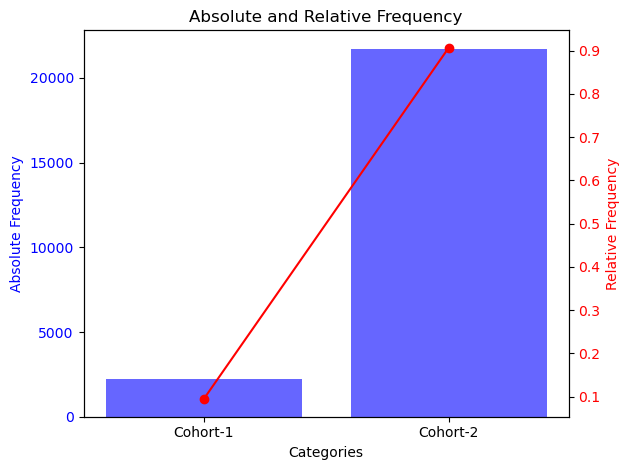

In [37]:
# Define the desired order of cohorts
desired_order = ['Cohort-1', 'Cohort-2']  # Adjust based on your actual cohort names

# Reorder the DataFrame according to the desired order
df_freq = df_freq.loc[desired_order]

# Now, re-run the plotting code
fig, ax1 = plt.subplots()

# Plot the absolute frequency on the left y-axis
ax1.bar(df_freq.index, df_freq['absolute_frequency'], color='b', alpha=0.6, label='Absolute Frequency')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Absolute Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the relative frequency
ax2 = ax1.twinx()
ax2.plot(df_freq.index, df_freq['relative_frequency'], color='r', label='Relative Frequency', marker='o')
ax2.set_ylabel('Relative Frequency', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and show the plot
plt.title('Absolute and Relative Frequency')
fig.tight_layout()

# Display the plot
plt.show()

### Incident Rate

### Revenue Generated by the Cohort

In [38]:

print("NaNs id in df_fees",df_fees["id"].isnull().sum())
print("NaNs cash_request_id in df_fees",df_fees["cash_request_id"].isnull().sum())
print("NaNs cash_request id in df_cash_request", df_cash_request["cash_request_id"].isnull().sum())

# create a new dataframe called merged_df_fees with the column cohort in it
merged_df_fees = df_fees.merge(df_cash_request[['cash_request_id', 'cohort']], on='cash_request_id', how='left')

print("NaNs cohort in df_fees",merged_df_fees.isnull().sum())

df_fees

NaNs id in df_fees 0
NaNs cash_request_id in df_fees 4
NaNs cash_request id in df_cash_request 0
NaNs cohort in df_fees id                    0
cash_request_id       4
type                  0
status                0
total_amount          0
reason                0
created_at            0
updated_at            0
paid_at            5530
charge_moment         0
postpone_fees         0
is_incident           0
cohort                4
dtype: int64


,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident
0,6537,14941.0,instant_payment,rejected,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False,False
1,6961,11714.0,incident,accepted,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False,True
2,16296,23371.0,instant_payment,accepted,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False,False
3,20775,26772.0,instant_payment,accepted,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False,False
4,11242,19350.0,instant_payment,accepted,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False,False
21057,20768,26764.0,instant_payment,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False,False
21058,18779,25331.0,instant_payment,rejected,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False,False
21059,16542,23628.0,instant_payment,rejected,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False,False


In [48]:
# find rows with NaNs
nan_rows = merged_df_fees["cohort"].isna().sum()
nan_rows

4

In [40]:
# Sum total amount for "cohorts-1"
cohort1_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-1"]["total_amount"].sum()

# Sum total amount for "cohorts-2"
cohort2_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-2"]["total_amount"].sum()

print(f"Total Amount for Cohorts-1: {cohort1_total}")
print(f"Total Amount for Cohorts-2: {cohort2_total}")

Total Amount for Cohorts-1: 1290.0
Total Amount for Cohorts-2: 104000.0


### New Relevant metric: Fee types usage

In [41]:
# create a crosstab with the types of fee incident per cohort proportionalized
result = pd.crosstab(merged_df_fees['cohort'], merged_df_fees['type'])
proportions_fees = (result.div(result.sum(axis=1), axis=0)).round(2)
proportions_fees

type,incident,instant_payment,postpone
cohort,,,
Cohort-1,0.17,0.00,0.83
Cohort-2,0.10,0.53,0.36


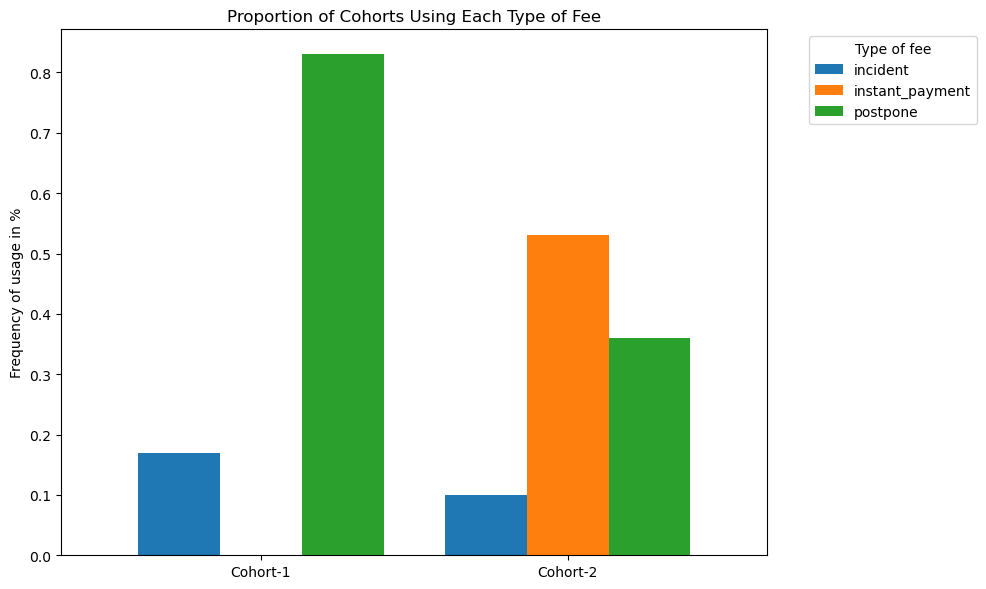

In [42]:
# Create a grouped bar plot
proportions_fees.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Proportion of Cohorts Using Each Type of Fee')
plt.ylabel('Frequency of usage in %')
plt.xlabel('')
plt.xticks(rotation=0)  # Keeps the cohort labels horizontal
plt.legend(title='Type of fee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [43]:
# Chi-square test for cohorts and type of fees
# Since p-value is very low we could say that the two variables have a significant association between them
# We reject the null hypothesis
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(result)
chi2_pvalue

1.2401462613213038e-65

In [44]:
# Computing the association between variables in 'result' using the "cramer" method
# However, given that the Cramer is too low we can say that there is no stron association between the two variables
association(result, method='cramer')

0.11914306814147266

In [49]:
## Save Dataframe to a CSV
df_cash_request_hist.to_csv('usersUsage.csv', index=False)
df_freq.to_csv('freqCohorts.csv', index=False)

# Incident Rate
# Revenue Generated by the Cohort
proportions_fees.to_csv('proportionFees.csv', index=False)
